In [1]:
## import library
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
df = pd.read_csv(r'Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Explore data

In [4]:
df_r = df.copy()

In [6]:
## number of reviews
len(df_r)

568454

In [7]:
## number of unique authors
df_r.UserId.nunique()

256059

In [9]:
## number of unique products
df_r.ProductId.nunique()

74258

<AxesSubplot:>

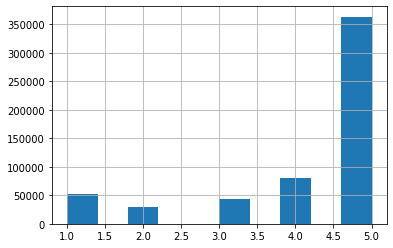

In [14]:
## Score distribution
df_r.Score.hist()

## Explore text

In [15]:
## calculate length
def customLength(x):
    if x == None:
        return 0
    else:
        return len(x)

In [18]:
df_r['body_length'] = df_r['Text'].map(lambda x: customLength(x))
df_r.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,body_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


In [36]:
## Order by desc for body_length
df_r.sort_values('body_length', ascending=False).head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,body_length
290807,290808,B005HG9ESG,A24HWYHR28JJ7A,&#131;&#367;&#142;&#378;&#376; &#969;&#364;&#...,10,11,3,1348272000,An okay filtered municipal tap water with slig...,Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...,21409
455393,455394,B005HG9ERW,A24HWYHR28JJ7A,&#131;&#367;&#142;&#378;&#376; &#969;&#364;&#...,10,11,3,1348272000,An okay filtered municipal tap water with slig...,Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...,21409
496753,496754,B005HG9ET0,A24HWYHR28JJ7A,&#131;&#367;&#142;&#378;&#376; &#969;&#364;&#...,10,11,3,1348272000,An okay filtered municipal tap water with slig...,Fuzzy Wuzzy's Summary:<br />*** Somewhat recom...,21409
68700,68701,B0051BWU92,A2GZG363BPADYC,Larry Deemer,4,4,5,1323993600,SEARCHING FOR A PET APPETITE ENHANCER?,**********************************************...,16952
346183,346184,B002P0Q14C,A1FLQ698D9C0C8,G. Zhang,0,2,5,1252800000,Tea Antioxidants,Tea Antioxidants<br />----------------<br /><b...,13065


<AxesSubplot:xlabel='Score', ylabel='body_length'>

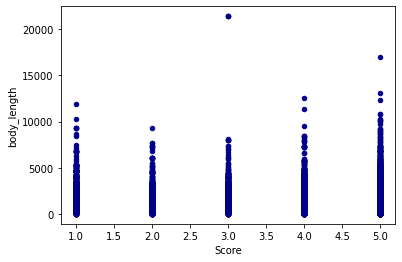

In [20]:
## Check relation between body_length and Score
df_r.plot.scatter(x='Score', y='body_length', c='DarkBlue')

## Groupby Product and User

In [26]:
## Find top10 products with most reviews
df_r_prod_top10 = df_r.groupby('ProductId').size().reset_index(name='review_count').sort_values('review_count', ascending=False).head(10)
df_r_prod_top10

,ProductId,review_count
71170,B007JFMH8M,913
37898,B0026RQTGE,632
42257,B002QWHJOU,632
42263,B002QWP89S,632
42264,B002QWP8H0,632
46205,B003B3OOPA,623
28624,B001EO5Q64,567
37798,B0026KPDG8,564
20497,B000VK8AVK,564
68860,B006HYLW32,564


In [27]:
## Find top10 users who wrote most reviews
df_r_users_top10 = df_r.groupby('UserId').size().reset_index(name='review_count').sort_values('review_count', ascending=False).head(10)
df_r_users_top10

,UserId,review_count
182011,A3OXHLG6DIBRW8,448
65586,A1YUL9PCJR3JTY,421
252275,AY12DBB0U420B,389
82919,A281NPSIMI1C2R,365
66162,A1Z54EM24Y40LL,256
55736,A1TMAVN4CEM8U8,204
110863,A2MUGFV2TDQ47K,201
191283,A3TVZM3ZIXG8YW,199
183161,A3PJZ8TU8FDQ1K,178
238453,AQQLWCMRNDFGI,176


## Convert timestamp to datetime

In [37]:
import datetime

In [52]:
df_r['changedTime'] = pd.to_datetime(df_r['Time'], unit='s')
df_r.sort_values('changedTime', ascending=False).head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,body_length,changedTime
14783,14784,B000S859NC,A2H7STZ2URUCOE,"Christopher Whedon ""the odd bead""",0,0,5,1351209600,GREAT TEA,Rooibos Natural Red tea is something of a pers...,408,2012-10-26
440485,440486,B002ZOCEMG,A1LIP0F4R542OQ,A,0,0,1,1351209600,:(,I just got this coffee a few days ago. I had c...,168,2012-10-26
535436,535437,B001EO5RSQ,A33W5JAFGHYRQZ,"ghermine ""ghermine""",0,0,5,1351209600,Love this Cereal!,There is nothing else like this on the market....,179,2012-10-26
7820,7821,B000HB9TLI,A353IAF5Y1XE53,"J. RIGOR ""shop mama""",0,0,1,1351209600,Don't like the taste,I do not like sour taste and this has a sour k...,112,2012-10-26
146094,146095,B000SDKDM4,A18NG9I9MT2V8I,"Emm ""Emm""",0,0,5,1351209600,Deeeee-lish!,For far too long I was a devotee of the Starbu...,228,2012-10-26
